In [1]:
# testing python behavior lol

example = "syscall        4"
parts = example.split()

print(parts)

['syscall', '4']


In [ ]:
import pandas as pd



In [6]:
# reivew this code later this may have been not the best solution but it works as a temporary thing?....

import pandas as pd
import re

# reading
with open('C:\stats_research\stats.stats\txt', 'r') as file:
    lines = file.readlines()

# Step 2: Extract key-value pairs
data = []
for line in lines:
    # Spli t the line into parts
    parts = line.split()
    if len(parts) < 2:
        continue
    
    key = parts[0]
    # Find the first number in the line after the key
    value = None
    for part in parts[1:]:
        if re.match(r'^[\d.e+-]+$', part):
            value = part
            break
    
    if value is not None:
        data.append([key, value])

# Step 3: Create a DataFrame
df = pd.DataFrame(data, columns=['Metric', 'Value'])

# Convert 'Value' column to numeric type if possible
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Display the DataFrame
print(df.head())


       Metric         Value
0  ----------           NaN
1  simSeconds  4.218000e-03
2    simTicks  4.217643e+09
3   finalTick  4.217643e+09
4     simFreq  1.000000e+12


In [7]:
df

,Metric,Value
0,----------,NaN
1,simSeconds,4.218000e-03
2,simTicks,4.217643e+09
3,finalTick,4.217643e+09
4,simFreq,1.000000e+12
...,...,...
390,system.membus.snoop_filter.hitSingleSnoops,0.000000e+00
391,system.membus.snoop_filter.hitMultiSnoops,0.000000e+00
392,system.workload.inst.arm,0.000000e+00
393,system.workload.inst.quiesce,0.000000e+00


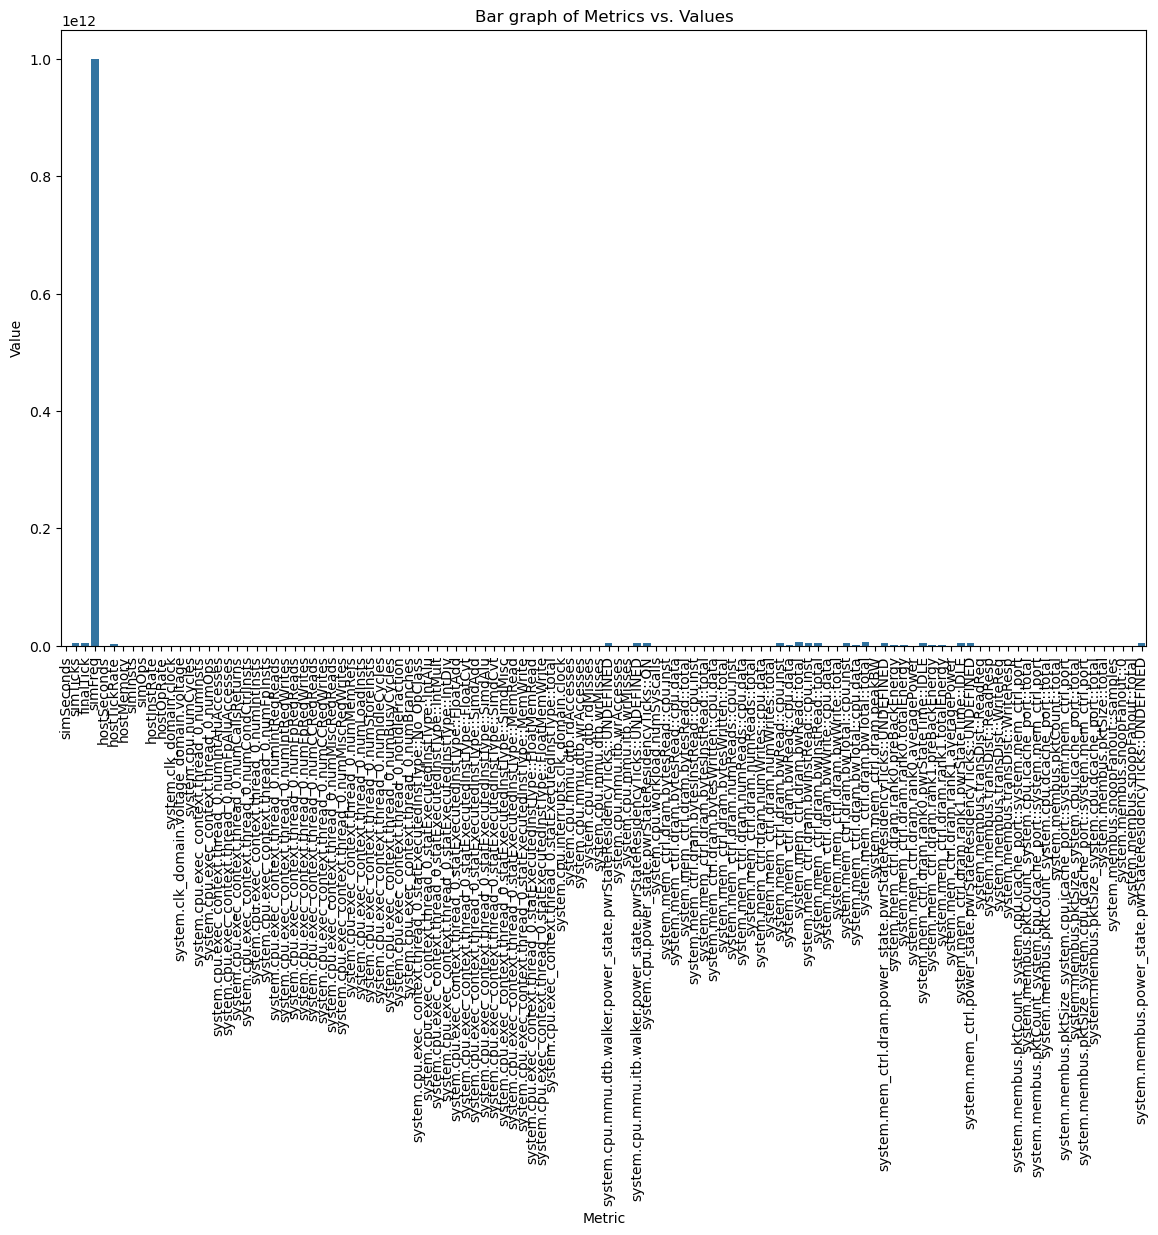

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna()

df = df[df['Value'] != 0]

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Metric', y='Value')


plt.xticks(rotation=90)  
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Bar graph of Metrics vs. Values')
plt.show()

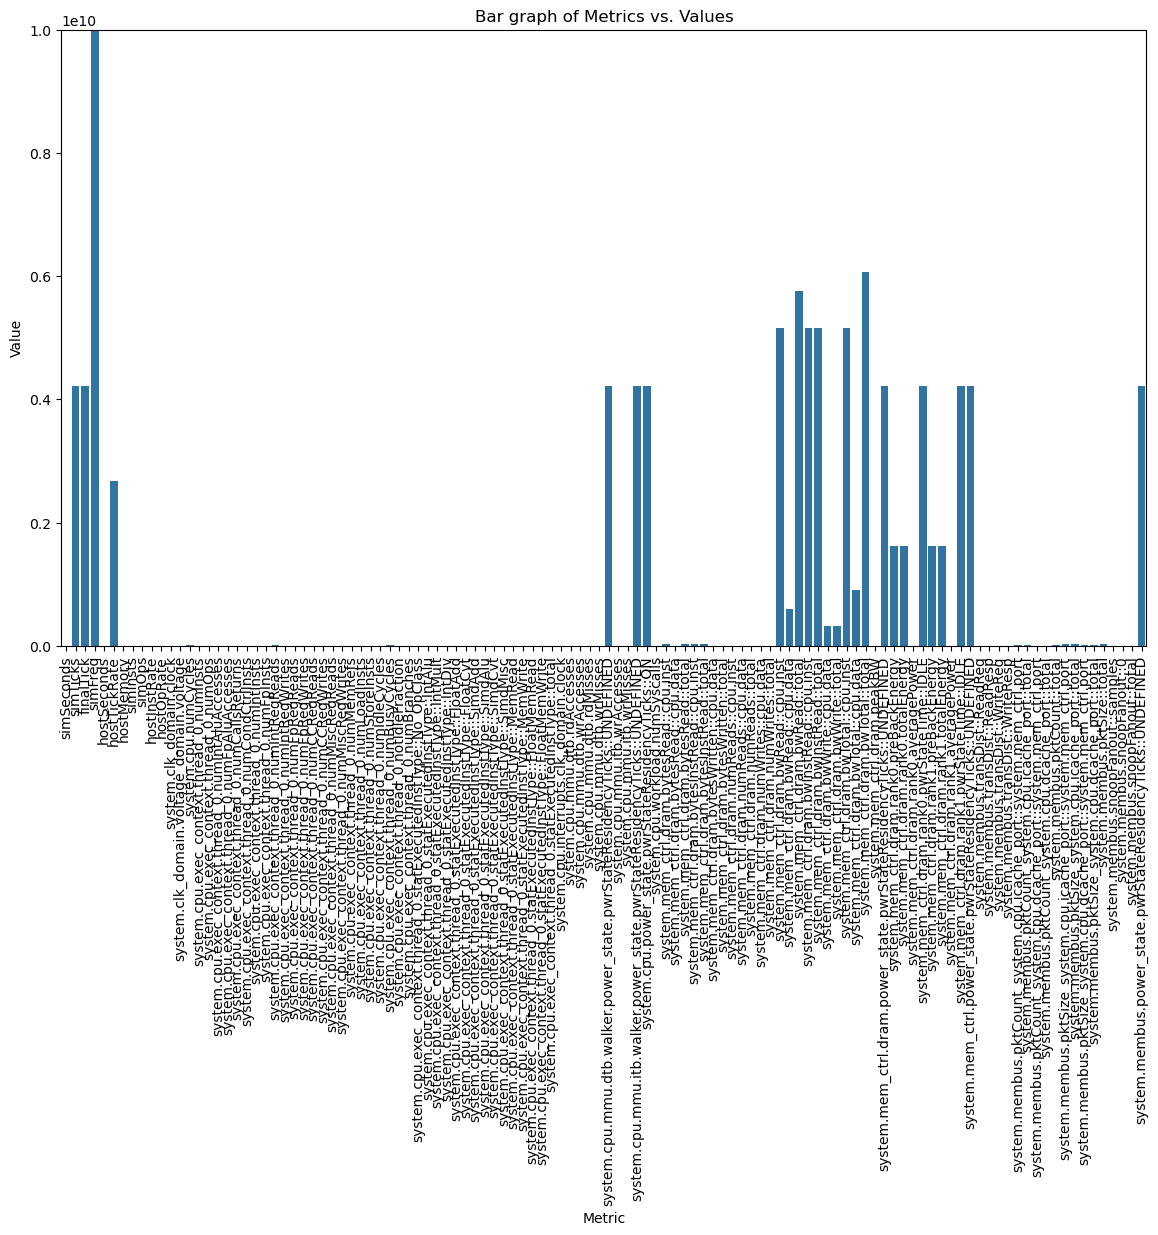

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna()

dfCheck = df[df['Value'] != 0]
plt.figure(figsize=(14, 8))
sns.barplot(data=dfCheck, x='Metric', y='Value')

plt.ylim(0, 1.0e10)
plt.xticks(rotation=90) 
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Bar graph of Metrics vs. Values')
plt.show()

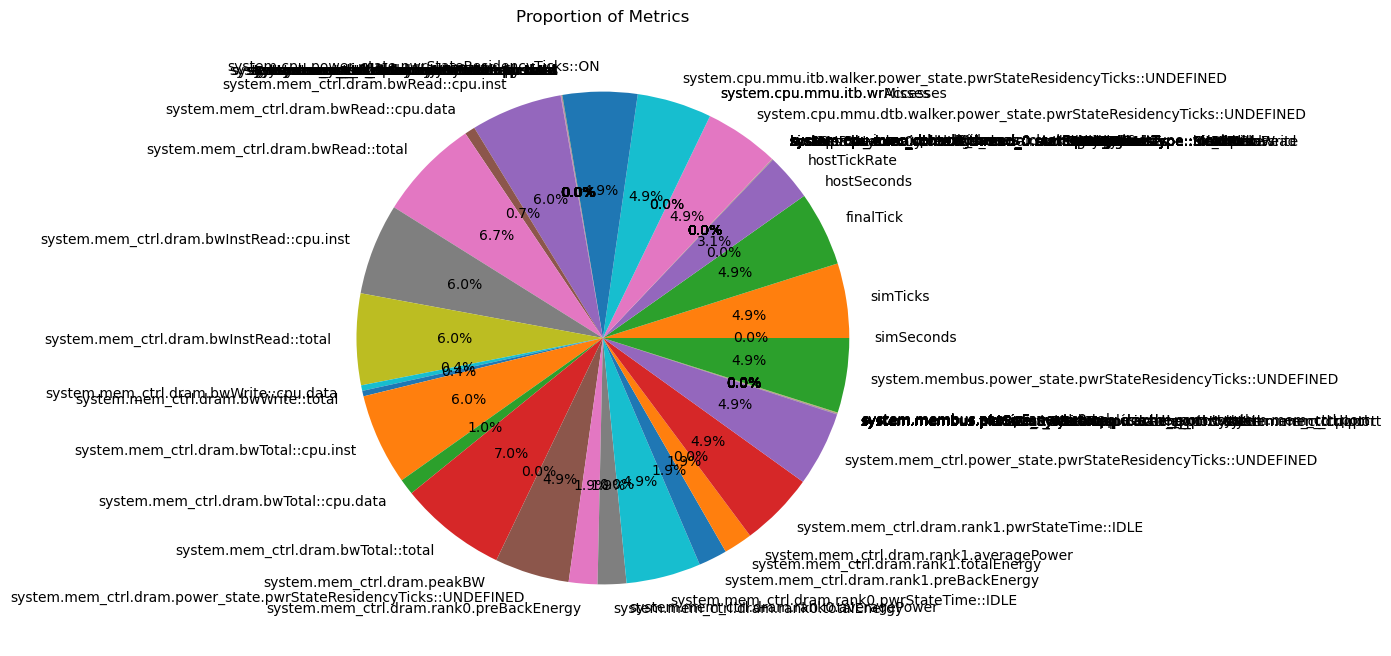

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# total value to get percentages using the count 
total_value = dfCheck['Value'].sum()

dfCheck = dfCheck[dfCheck['Metric'] != 'simFreq']

#note that simFreq has a percentage of 92.1%, a drastically high number lol 

dfCheck['Proportion'] = dfCheck['Value'] / total_value

plt.figure(figsize=(10, 8))
plt.pie(dfCheck['Proportion'], labels=dfCheck['Metric'], autopct='%1.1f%%')
plt.title('Proportion of Metrics')
plt.show()